In [116]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [117]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Exploratory Data Analysis(EDA)

In [118]:
df.shape

(32560, 15)

This dataset contain 32560 rows and 15 columns

In [119]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

Dataset contains int and object type data

In [120]:
#to get good overview of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


This gives the information about the dataset which includes indexing type, non null values and memory usage

In [121]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [122]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no missing values present in the dataset

# Visualizing null Values

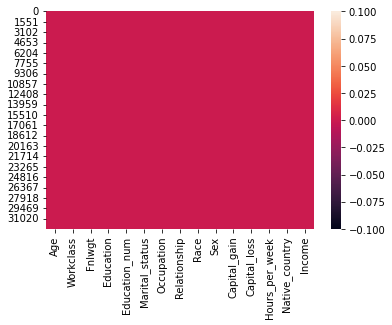

In [123]:
sns.heatmap(df.isnull())
plt.show()

By visualizing also we can say that there are no missing values

In [124]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

These are the columns present in the dataset

In [11]:
#checking the value counts of each columns
for i in df.columns:
    print(df[i].value_counts())
    print('**********************************')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
**********************************
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
**********************************
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64
**********************************
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate     

Here the columns capital gain and capital loss have more than 90% of zeroes and it is not required for our prediction. Lets drop it

In [125]:
#dropping the columns having more number of 0's
df.drop("Capital_gain", axis=1, inplace=True)
df.drop("Capital_loss", axis=1, inplace=True)

# Filling '?' Values

There are some '?' entried in workclass, occupation, and native_country column. We will fill "?" values with most frequently
occuring values of the respective columns that is their mode values.

In [126]:
df['Workclass'] = df.Workclass.str.replace('?', 'Private')
df['Occupation'] = df.Occupation.str.replace('?', 'Prof-specialty')
df['Native_country'] = df.Native_country.str.replace('?', 'United-states')

In [127]:
df['Workclass'].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [128]:
df['Occupation'].value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [129]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 United-states                   583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

# Feature Engineering

Most of the columns have unique type of classes, lets replace them with the new classes

In [130]:
df.Workclass=df.Workclass.replace([' Local-gov',' State-gov',' Federal-gov'],' Govt-Sector')
df.Workclass=df.Workclass.replace([' Private',' Self-emp-not-inc',' Self-emp-inc'],' Pvt-sector')
df.Workclass=df.Workclass.replace([' Without-pay',' Never-worked'],' Not-working')

In [131]:
df["Workclass"].value_counts()

 Pvt-sector     28189
 Govt-Sector     4350
 Not-working       21
Name: Workclass, dtype: int64

In [132]:
df["Education"]=df["Education"].replace([' Preschool',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th',' 11th',' 12th'],'School')
df["Education"]=df["Education"].replace([' HS-grad',' Prof-school'],' High-School')
df["Education"]=df["Education"].replace([' Some-college',' Assoc-voc',' Assoc-acdm'],' Secondary-School')
df["Education"]=df["Education"].replace([' Bachelors',],' Under_Graduation')
df["Education"]=df["Education"].replace([' Masters'],' Post_Graduation')
df["Education"]=df["Education"].replace([' Doctorate'],' PhD')

In [133]:
df["Education"].value_counts()

 High-School         11077
 Secondary-School     9740
 Under_Graduation     5354
School                4253
 Post_Graduation      1723
 PhD                   413
Name: Education, dtype: int64

In [134]:
df["Marital_status"]=df["Marital_status"].replace([' Married-civ-spouse',' Married-AF-spouse'],' Married')
df["Marital_status"]=df["Marital_status"].replace([' Never-married'],' Single')
df["Marital_status"]=df["Marital_status"].replace([' Divorced',' Widowed',' Separated',' Married-spouse-absent',],' Others')


In [135]:
df["Marital_status"].value_counts()

 Married    14999
 Single     10682
 Others      6879
Name: Marital_status, dtype: int64

In [136]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Pvt-sector,83311,Under_Graduation,13,Married,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Pvt-sector,215646,High-School,9,Others,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Pvt-sector,234721,School,7,Married,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Pvt-sector,338409,Under_Graduation,13,Married,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Pvt-sector,284582,Post_Graduation,14,Married,Exec-managerial,Wife,White,Female,40,United-States,<=50K


In [137]:
#Checking the list of values counts in Income
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

There are two unique values in the target columns and data is not balanced

In [138]:
#Checking if dataset contain any space
df.loc[df['Income']== " "]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income


It seems there are no spaces in dataset

# Statistical summary of Dataset

In [139]:
df.describe()

,Age,Fnlwgt,Education_num,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,40.437469
std,13.640642,1.055498e+05,2.572709,12.347618
min,17.000000,1.228500e+04,1.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99.000000


The mean is more than median in all the columns which means they are skewed to right

In some columns differece is more between max and 75%, hence outliers are present

# checking for categorical columns

In [140]:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


These are the Categorical Columns present in the dataset

# Simlarly checking for numeric columns

In [141]:
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week']


These are the Numeric Columns present in the dataset

# Data Visualization

Univariate Analysis: Plotting categirical columns

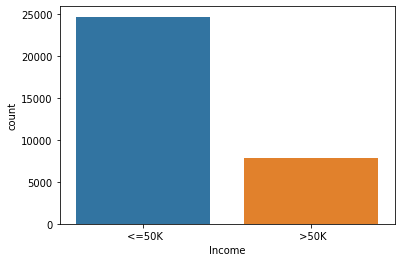

In [142]:
#count plot for Income
sns.countplot(df['Income']);

Most of the people have income lessthan or equal to 50k and we can also see data imbalance issue

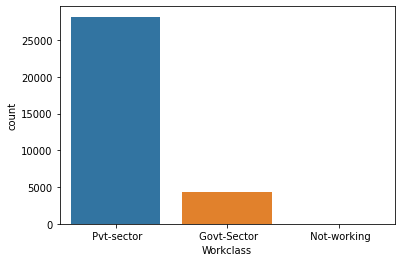

In [143]:
#count plot for Workclass
sns.countplot(df['Workclass']);

The count of private work class is high compare to others. The people who worked in private sector have high count

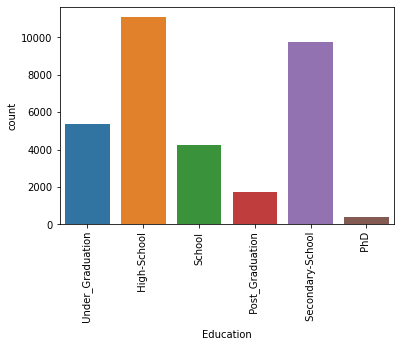

In [144]:
#count plot for Education

sns.countplot(df['Education'])
plt.xticks(rotation=90)
plt.show()

The count of High school is high followed by secondary school. 

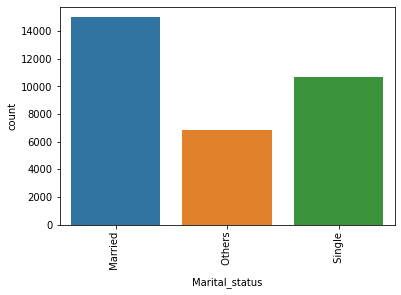

In [145]:
#count plot for Marital_status

sns.countplot(df['Marital_status'])
plt.xticks(rotation=90)
plt.show()

The count of Married people is high followed by others

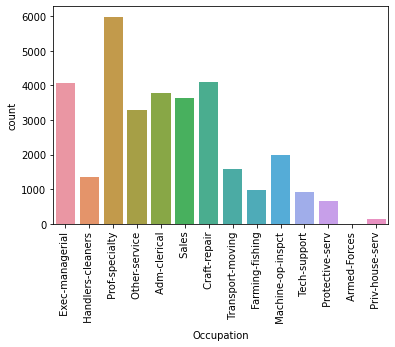

In [146]:
#count plot for Occupation

sns.countplot(df['Occupation'])
plt.xticks(rotation=90)
plt.show()

The people who are in prof specialty have high count followed by others.

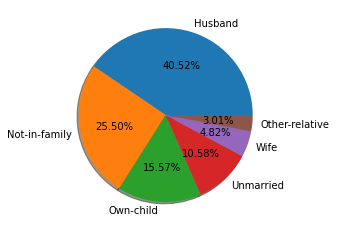

In [147]:
#plotting pie chart for Relationship

df["Relationship"].value_counts()
labels='Husband','Not-in-family','Own-child','Unmarried','Wife','Other-relative'
fig, ax =plt.subplots()
ax.pie(df["Relationship"].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

By looking into the pie plot we can see that most of the counts in with Husband followed by others

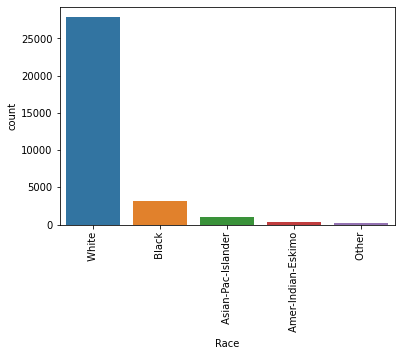

In [148]:
#count plot for Race

sns.countplot(df['Race'])
plt.xticks(rotation=90)
plt.show()

In US white people have more chance of getting job than other raced people

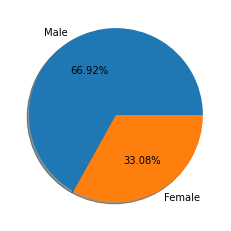

In [149]:
#visualizing the count for sex group of people

labels='Male','Female'
fig, ax =plt.subplots()
ax.pie(df["Sex"].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

The count of male is hign 66.92% compare to females with 33.08% count

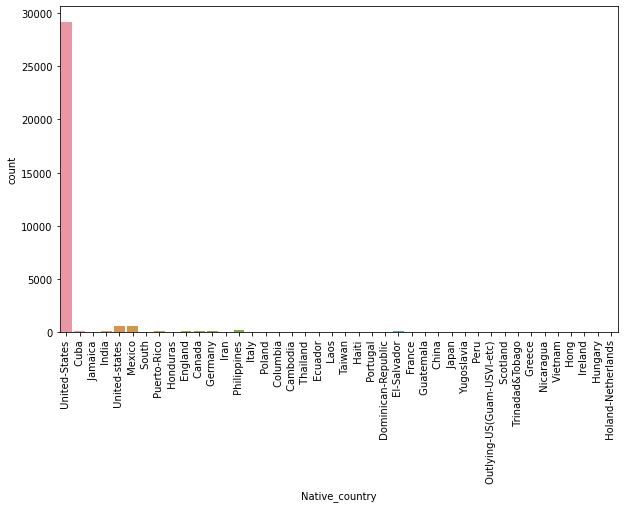

In [150]:
#count plot for Native country

plt.figure(figsize=(10,6))
sns.countplot(df['Native_country'])
plt.xticks(rotation=90)
plt.show()

The United States have highest count compare to others

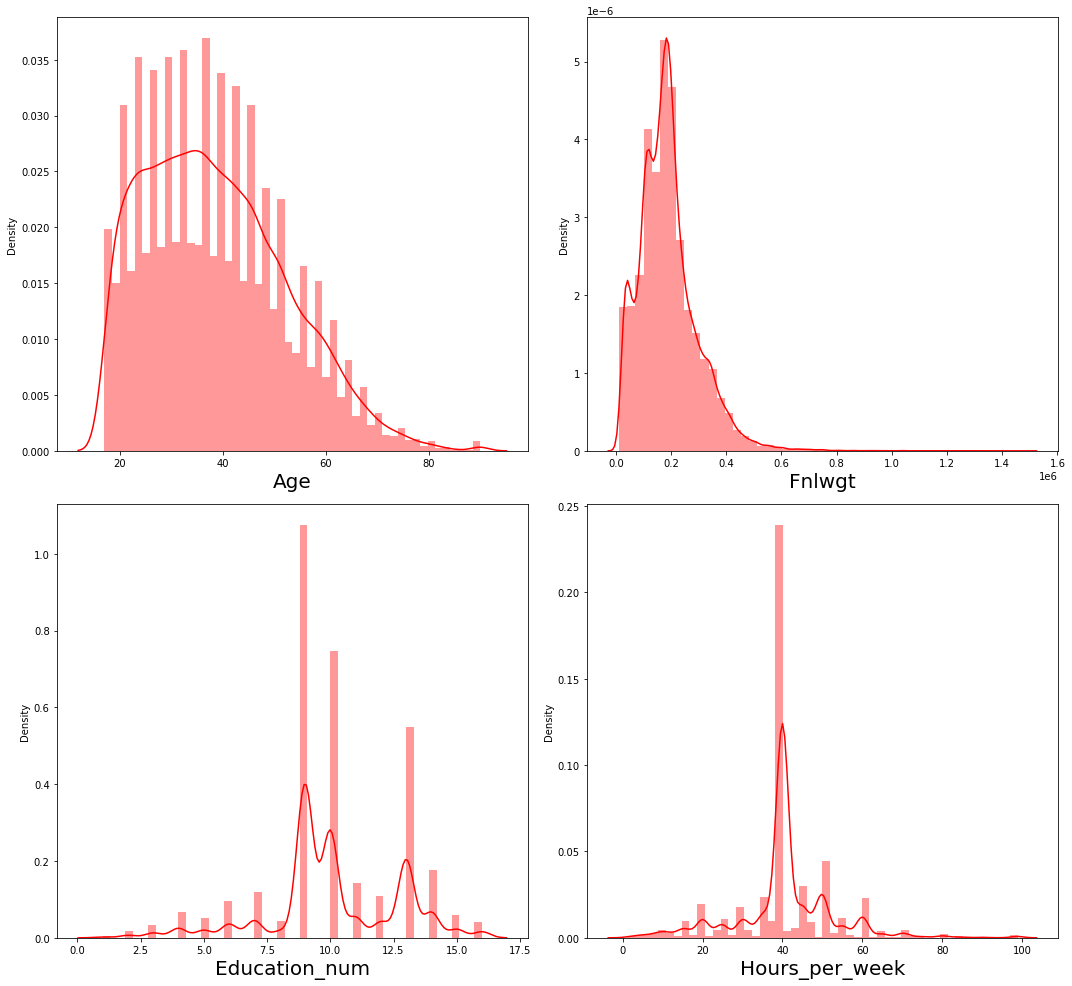

In [151]:
#Checking how data has beed distributed in each numeric column

plt.figure(figsize=(15,20), facecolor= 'white')
plotnumber=1

for column in numerical_col:
    if plotnumber <=9:
        ax= plt.subplot(3,2, plotnumber)
        sns.distplot(df[column], color='red')
        plt.xlabel(column, fontsize=20)
        
        
    plotnumber +=1
plt.tight_layout()

All numeric columns are Skewed but skewness is less in age

# Bivariate Analysis

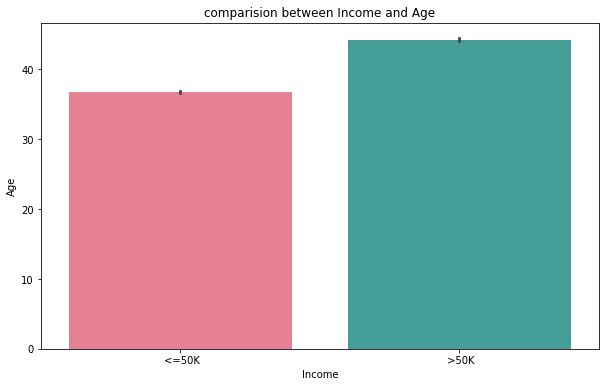

In [152]:
plt.figure(figsize=[10,6])
plt.title('comparision between Income and Age')
sns.barplot(df['Income'], df['Age'],palette="husl")

People whose age is morethan 40 have annual income morethan 50k

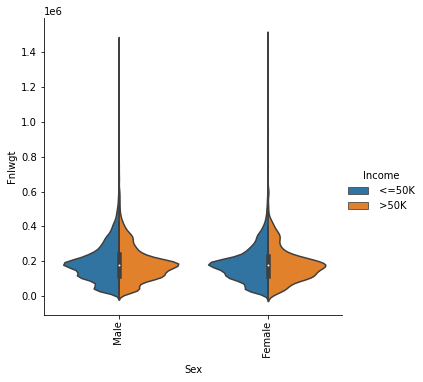

In [153]:
#let us plot catplot for sex and fnlwgt

sns.catplot(x= "Sex", y= "Fnlwgt", hue= "Income", kind= "violin", data=df, split=True)
plt.xticks(rotation=90);

For both male and Female the Fnlwgt is same and they have same income also

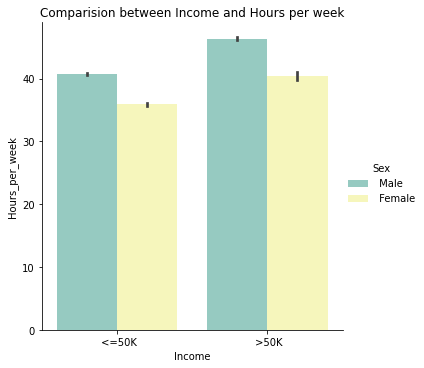

In [154]:
#visualizing the number of hours per week with income

sns.catplot(x= "Income", y= "Hours_per_week", hue= "Sex", kind= "bar", data=df, palette="Set3")
plt.title("Comparision between Income and Hours per week")
plt.show()

This shows how the income is related t hours per week, The income is >50k when the hours is high for both male and female

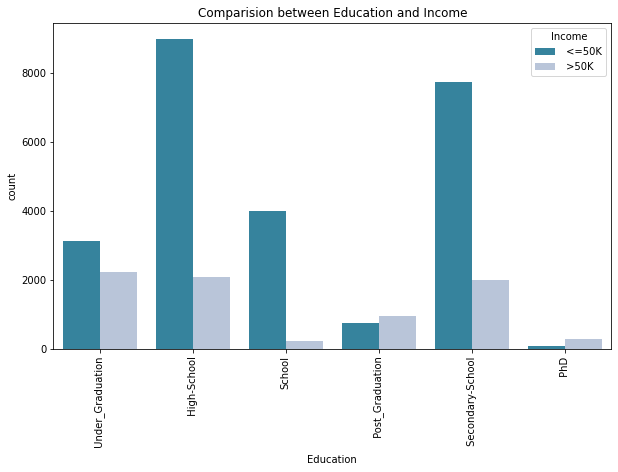

In [155]:
#visualizing the relastion between education and income

plt.figure(figsize=(10,6))
sns.countplot(df['Education'], hue=df['Income'], palette="PuBuGn_r")
plt.title("Comparision between Education and Income")
plt.xticks(rotation=90)
plt.show()

The people who completed high school have income <=50k, followed by the people who done their secodaryThe peple who
have done their graduation they are earning more income that is>50k

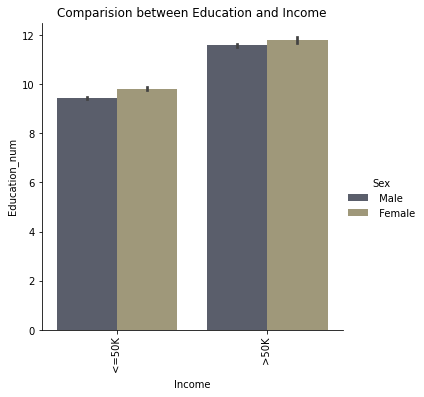

In [156]:
#visualizing the number of education and income

sns.catplot(x='Income', y='Education_num', data=df, kind='bar', hue='Sex', palette="cividis")
plt.title("Comparision between Education and Income")
plt.xticks(rotation=90)
plt.show()

The income is morethan 50k for the people having high education number. here both gende having the income more than 50k

<Figure size 720x432 with 0 Axes>

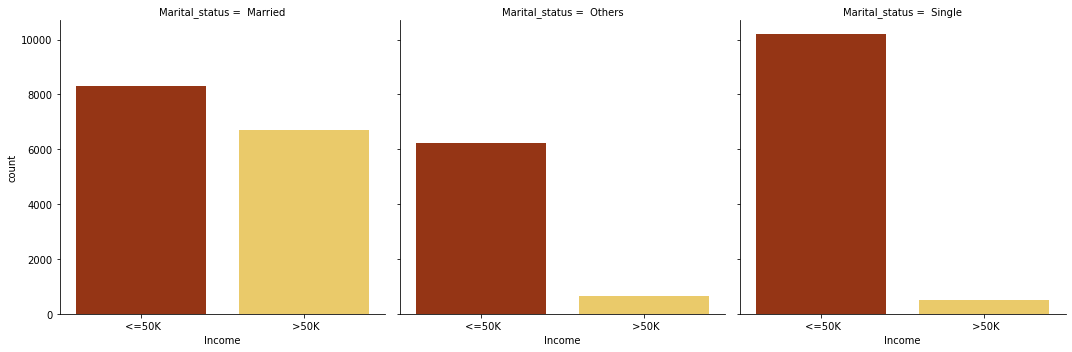

In [157]:
#visualizing the relationship between Marital staus and income
plt.figure(figsize=(10,6))
sns.catplot(x='Income',col="Marital_status", data=df, kind='count', palette="afmhot")
plt.show()

Marrital people getting income>50k compare to others and other are getting <=50k

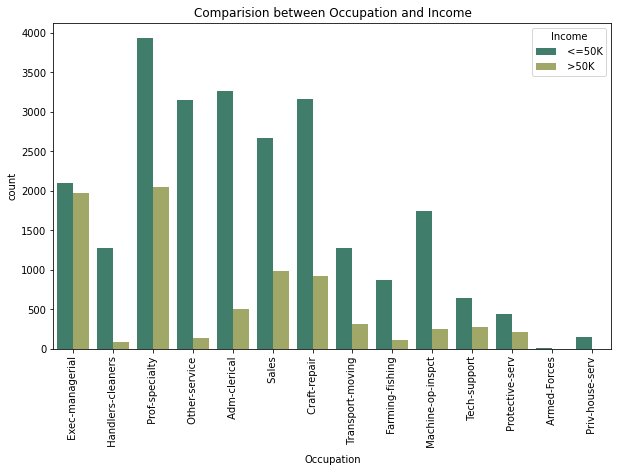

In [158]:
#visualizing the relationship between occupation and income
plt.figure(figsize=(10,6))
sns.countplot(df['Occupation'], hue=df['Income'], palette="gist_earth")
plt.title("Comparision between Occupation and Income")
plt.xticks(rotation=90)
plt.show()

The people in the position prof speciality and exce-managerial have income morethan 50k followed by others.

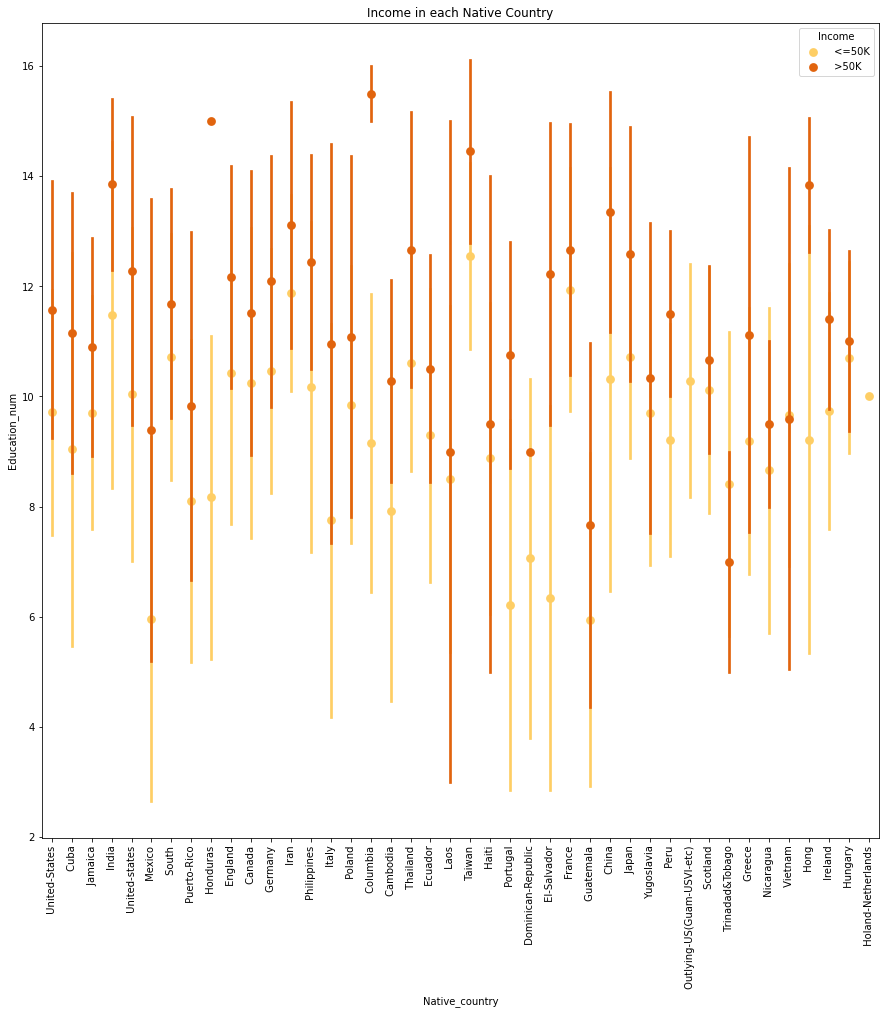

In [159]:
#visualizing the relationship between Marital staus and income
plt.figure(figsize=(15,15))
plt.title("Income in each Native Country")
sns.pointplot(x='Native_country',y="Education_num", data=df, hue='Income', join=False, palette="YlOrBr", ci="sd")
plt.xticks(rotation=90)
plt.show()

The countries having high education  numbers  have high income morethan 50k

# Multivariate Analysis

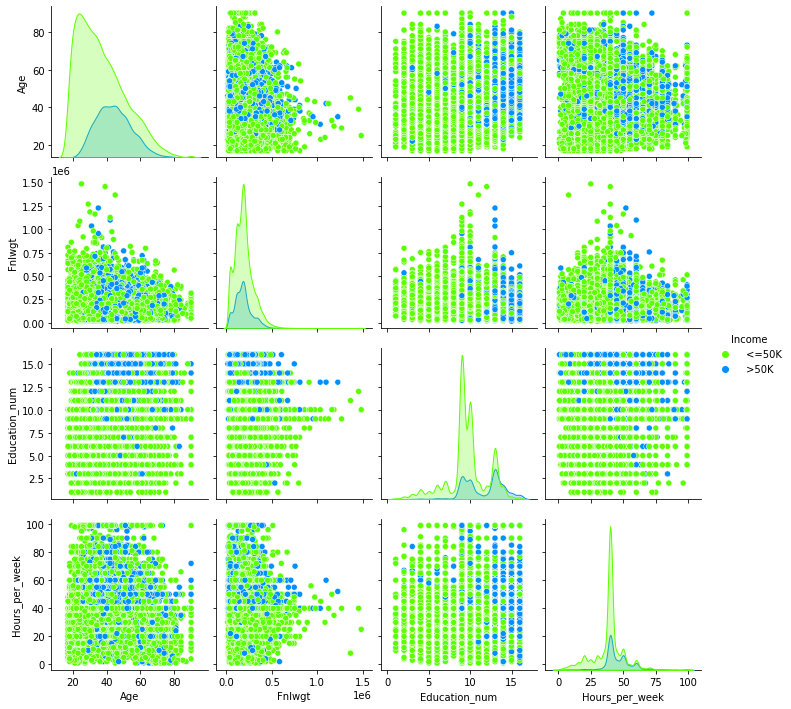

In [160]:
sns.pairplot(df, hue="Income", palette="gist_rainbow")

Above are the paiplot for df and there are some extreme outliers in dataset. Also, skewness is present

# Identifying the Outliers

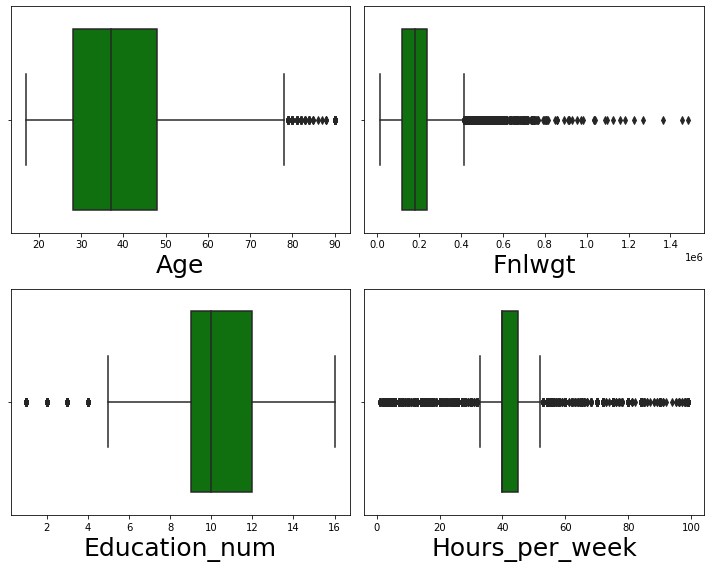

In [161]:
plt.figure(figsize=(10,8), facecolor= 'white')
plotnumber=1

for column in numerical_col:
    if plotnumber <=4:
        ax= plt.subplot(2,2, plotnumber)
        sns.boxplot(df[column], color='g')
        plt.xlabel(column, fontsize=25)
        
        
    plotnumber +=1
plt.tight_layout()

Outliers are present in all the numeric columns

# Removing Outliers

In [162]:
features=df[["Age","Fnlwgt","Education_num","Hours_per_week"]]

In [163]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Pvt-sector,83311,Under_Graduation,13,Married,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Pvt-sector,215646,High-School,9,Others,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Pvt-sector,234721,School,7,Married,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Pvt-sector,338409,Under_Graduation,13,Married,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Pvt-sector,284582,Post_Graduation,14,Married,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Pvt-sector,257302,Secondary-School,12,Married,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Pvt-sector,154374,High-School,9,Married,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Pvt-sector,151910,High-School,9,Others,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Pvt-sector,201490,High-School,9,Single,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [164]:
df.shape

(32560, 13)

In [165]:
df_new.shape

(31461, 13)

after removing the outliers we have 31461 rows 13 columns

In [166]:
data_loss=(32560-31461)/32560*100

In [54]:
data_loss

3.3753071253071254

Here we are lossing only 3 percent of data

# Cheking the Skewness

In [168]:
df_new.skew()

Age               0.472279
Fnlwgt           -0.376609
Education_num    -0.159752
Hours_per_week   -0.341724
dtype: float64

# Removing skewness

In [167]:
df_new["Fnlwgt"] =np.cbrt(df["Fnlwgt"])

In [57]:
df_new.skew()

Age               0.472279
Fnlwgt           -0.376609
Education_num    -0.159752
Hours_per_week   -0.341724
dtype: float64

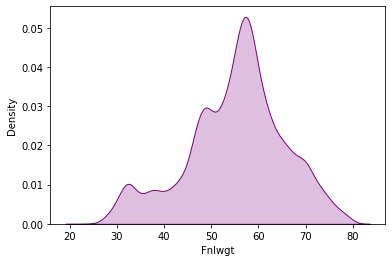

In [169]:
sns.distplot(df_new["Fnlwgt"],color="purple",kde_kws={"shade": True},hist=False)

The data is almost normal and has no skewness

# Encoding the Categorical columns using Label Encoding

In [170]:
categorical_col = ["Workclass","Education", "Marital_status","Occupation", "Relationship", "Race", "Sex", "Native_country","Income"]

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df_new[categorical_col] = df_new[categorical_col].apply(LE.fit_transform)

df_new[categorical_col]

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,2,4,0,3,0,4,1,38,0
1,2,0,1,5,1,4,1,38,0
2,2,5,0,5,0,2,1,38,0
3,2,4,0,9,5,2,0,4,0
4,2,2,0,3,5,4,0,38,0
...,...,...,...,...,...,...,...,...,...
32555,2,3,0,12,5,4,0,38,0
32556,2,0,0,6,0,4,1,38,1
32557,2,0,1,0,4,4,0,38,0
32558,2,0,2,0,3,4,1,38,0


# Correlation between the target variables  and independent variables using Heat Map

In [171]:
corr=df_new.corr()
corr

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,-0.083976,-0.062328,-0.056513,0.053361,-0.476050,-0.001321,-0.268028,0.030679,0.091664,0.097510,-0.001143,0.248351
Workclass,-0.083976,1.000000,0.021537,-0.010521,-0.160112,0.033947,0.005930,-0.001453,0.052175,0.036279,-0.004063,-0.031990,-0.061518
Fnlwgt,-0.062328,0.021537,1.000000,0.008014,-0.031874,0.030462,0.001524,0.009060,-0.006959,0.023307,-0.015820,-0.061084,-0.002780
Education,-0.056513,-0.010521,0.008014,1.000000,-0.019490,0.062948,0.050740,0.017626,-0.006040,-0.013606,-0.062493,-0.053916,0.011902
Education_num,0.053361,-0.160112,-0.031874,-0.019490,1.000000,-0.071406,0.073927,-0.102497,0.030849,0.016662,0.160483,0.055059,0.337595
Marital_status,-0.476050,0.033947,0.030462,0.062948,-0.071406,1.000000,0.001052,0.451130,-0.081701,-0.336209,-0.241789,0.009095,-0.425904
Occupation,-0.001321,0.005930,0.001524,0.050740,0.073927,0.001052,1.000000,-0.037549,-0.004094,0.047864,-0.019943,-0.003606,0.034612
Relationship,-0.268028,-0.001453,0.009060,0.017626,-0.102497,0.451130,-0.037549,1.000000,-0.115216,-0.582940,-0.263412,-0.010913,-0.251506
Race,0.030679,0.052175,-0.006959,-0.006040,0.030849,-0.081701,-0.004094,-0.115216,1.000000,0.088642,0.045331,0.119285,0.072451
Sex,0.091664,0.036279,0.023307,-0.013606,0.016662,-0.336209,0.047864,-0.582940,0.088642,1.000000,0.239039,0.002413,0.216665


This gives the correlation between the dependent and independent varible. We can visualize this by plotting heatmap

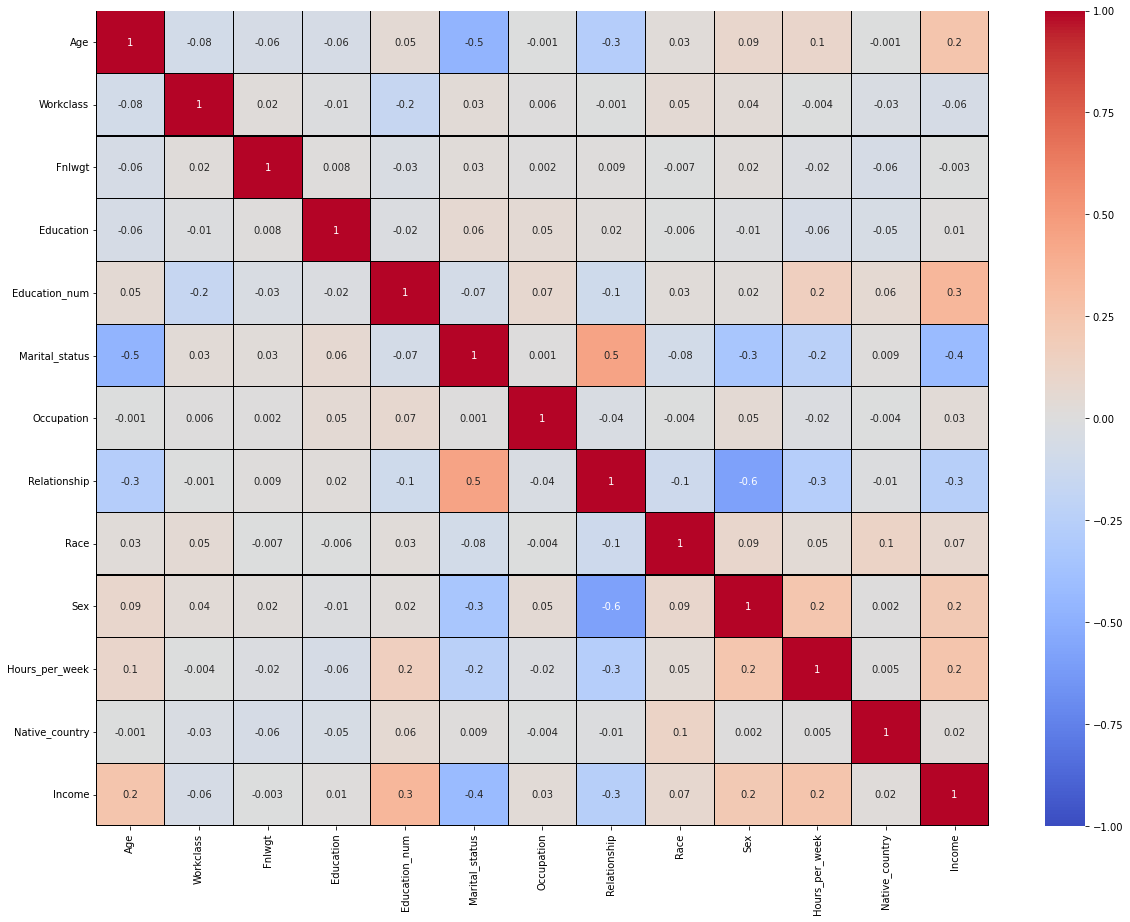

In [172]:
#Visualizing the correlation using heat map

plt.figure(figsize=(20,15))
sns.heatmap(df_new.corr(), linewidths=.1,vmin=-1,vmax=1,fmt='.1g',annot=True,linecolor="black", annot_kws={'size':10}, cmap="coolwarm")
plt.yticks(rotation=0);

There is no multicolinearity issue.

Workclass and Fnlwgt has very less correlation with target column

Native_country, occupation, race and education has less correlation with target column

The columns education_num age and sex nd hours_per_week have postive correlation with target

In [173]:
corr['Income'].sort_values(ascending=False)

Income            1.000000
Education_num     0.337595
Age               0.248351
Hours_per_week    0.242383
Sex               0.216665
Race              0.072451
Occupation        0.034612
Native_country    0.017672
Education         0.011902
Fnlwgt           -0.002780
Workclass        -0.061518
Relationship     -0.251506
Marital_status   -0.425904
Name: Income, dtype: float64

# Visualizing the correlation between label and features using bar plot

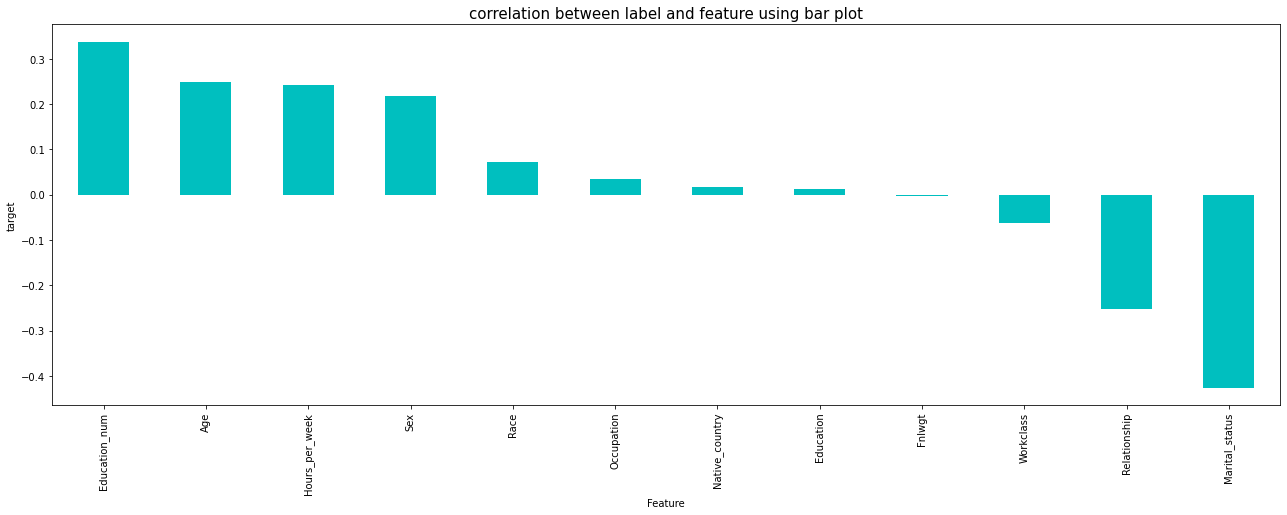

In [174]:
plt.figure(figsize=(22,7))
df_new.corr()['Income'].sort_values(ascending=False).drop('Income').plot(kind='bar', color='c')
plt.xlabel('Feature', fontsize=10)
plt.ylabel('target', fontsize=10)
plt.title('correlation between label and feature using bar plot', fontsize=15)
plt.show()

The column Fnlwgt has very less corelation qith label so we can drop it

# Seperating the features  and label variables into x and y

In [175]:
x=df_new.drop("Income", axis=1)
y=df_new["Income"]

In [176]:
x.shape

(31461, 12)

In [177]:
y.shape

(31461,)

# Scaling the data using Standard Scaler

In [178]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.875057,0.39632,-1.102052,0.920858,1.154324,-0.990371,-0.784335,-0.903178,0.391304,0.706601,-2.424121,0.250348
1,-0.025350,0.39632,0.464976,-1.259430,-0.459657,0.147158,-0.282327,-0.281938,0.391304,0.706601,-0.008364,0.250348
2,1.100158,0.39632,0.630260,1.465930,-1.266647,-0.990371,-0.282327,-0.903178,-1.969806,0.706601,-0.008364,0.250348
3,-0.775689,0.39632,1.399791,0.920858,1.154324,-0.990371,0.721690,2.203019,-1.969806,-1.415226,-0.008364,-5.454247
4,-0.100384,0.39632,1.023711,-0.169286,1.557819,-0.990371,-0.784335,2.203019,0.391304,-1.415226,-0.008364,0.250348
...,...,...,...,...,...,...,...,...,...,...,...,...
31456,-0.850723,0.39632,0.814728,0.375786,0.750829,-0.990371,1.474703,2.203019,0.391304,-1.415226,-0.187309,0.250348
31457,0.124718,0.39632,-0.143169,-1.259430,-0.459657,-0.990371,-0.031323,-0.903178,0.391304,0.706601,-0.008364,0.250348
31458,1.475327,0.39632,-0.170768,-1.259430,-0.459657,0.147158,-1.537348,1.581780,0.391304,-1.415226,-0.008364,0.250348
31459,-1.225892,0.39632,0.335900,-1.259430,-0.459657,1.284688,-1.537348,0.960541,0.391304,0.706601,-1.797814,0.250348


In [179]:
y.value_counts()

0    23853
1     7608
Name: Income, dtype: int64

# Balancing the target variable using Oversampling:

In [180]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x, y = SM.fit_resample(x,y)

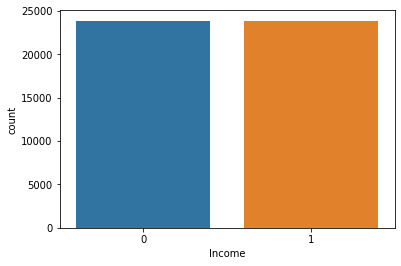

In [181]:
y.value_counts()
sns.countplot(y)

Now the data is balanced

In [182]:
#dataframe after precessing and data cleaning

df_new.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,2,43.675121,4,13,0,3,0,4,1,13,38,0
1,38,2,59.967204,0,9,1,5,1,4,1,40,38,0
2,53,2,61.685627,5,7,0,5,0,2,1,40,38,0
3,28,2,69.686283,4,13,0,9,5,2,0,40,4,0
4,37,2,65.776255,2,14,0,3,5,4,0,40,38,0


# Finding the best Random State and accuracy

In [183]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.30, random_state=i)
    DTC=DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred=DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Best Accuracy is", maxAccu, "on Random_state", maxRs)

Best Accuracy is 0.839854667411962 on Random_state 8


In [184]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.30, random_state=8)

# Decision Tree Classifier

In [185]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,r2_score,roc_curve, confusion_matrix
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split, cross_validate,GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


In [186]:
#checking accuracy for decision tree classifier

DTC=DecisionTreeClassifier()
DTC.fit(x_train, y_train)

predDTC= DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test, predDTC))

0.8358719955282281
[[5924 1232]
 [1117 6039]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      7156
           1       0.83      0.84      0.84      7156

    accuracy                           0.84     14312
   macro avg       0.84      0.84      0.84     14312
weighted avg       0.84      0.84      0.84     14312



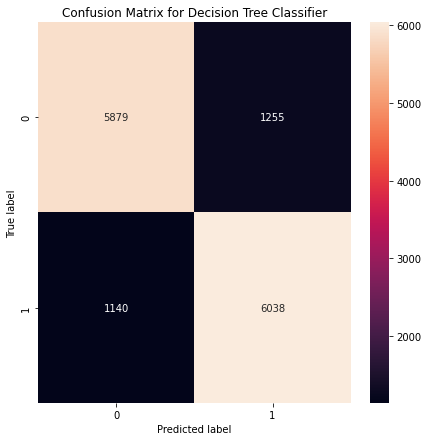

In [76]:
#lets plot confusion matrix for DTC

cm= confusion_matrix(y_test, predDTC)

x_axis_labels =["0","1"]
y_axis_labels =["0","1"]

f, ax =plt.subplots(figsize=(7,7))

sns.heatmap(cm, annot=True, fmt='.0f', ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# Random Forest Classifer

In [187]:
RFC=RandomForestClassifier()
RFC.fit(x_train, y_train)

predRFC= RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

0.8806595863610955
[[6166  990]
 [ 718 6438]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      7156
           1       0.87      0.90      0.88      7156

    accuracy                           0.88     14312
   macro avg       0.88      0.88      0.88     14312
weighted avg       0.88      0.88      0.88     14312



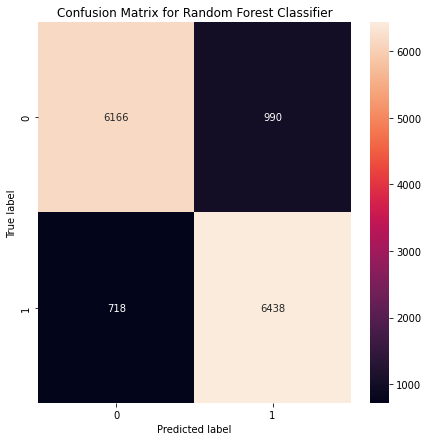

In [188]:
#lets plot confusion matrix for RFC

cm= confusion_matrix(y_test, predRFC)

x_axis_labels =["0","1"]
y_axis_labels =["0","1"]

f, ax =plt.subplots(figsize=(7,7))

sns.heatmap(cm, annot=True, fmt='.0f', ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

# Logistic Regression Classifier

In [189]:
LR=RandomForestClassifier()
LR.fit(x_train, y_train)

predLR= LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

0.8788429290106204
[[6155 1001]
 [ 733 6423]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      7156
           1       0.87      0.90      0.88      7156

    accuracy                           0.88     14312
   macro avg       0.88      0.88      0.88     14312
weighted avg       0.88      0.88      0.88     14312



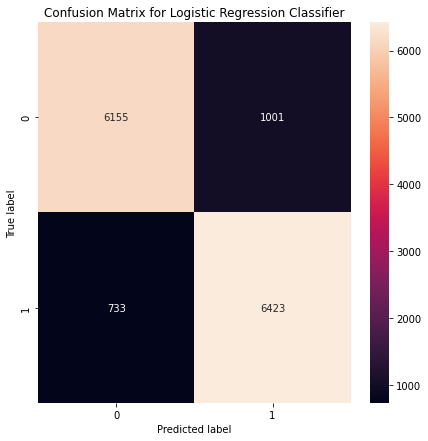

In [190]:
#lets plot confusion matrix for LR

cm= confusion_matrix(y_test, predLR)

x_axis_labels =["0","1"]
y_axis_labels =["0","1"]

f, ax =plt.subplots(figsize=(7,7))

sns.heatmap(cm, annot=True, fmt='.0f', ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

# KNeighbors Classifier

In [191]:
#checking accuracy for KNeighbors classifier

knn=KNN()
knn.fit(x_train, y_train)

predknn= knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test, predknn))

0.8424399105645612
[[5464 1692]
 [ 563 6593]]
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      7156
           1       0.80      0.92      0.85      7156

    accuracy                           0.84     14312
   macro avg       0.85      0.84      0.84     14312
weighted avg       0.85      0.84      0.84     14312



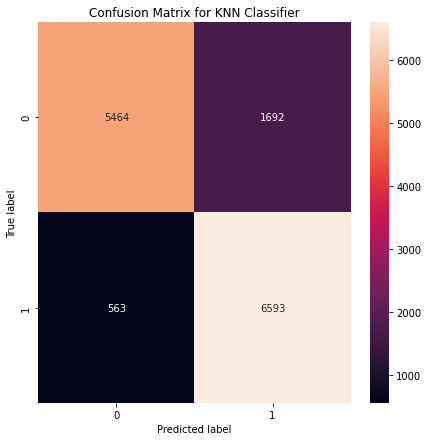

In [192]:
#lets plot confusion matrix for KNN

cm= confusion_matrix(y_test, predknn)

x_axis_labels =["0","1"]
y_axis_labels =["0","1"]

f, ax =plt.subplots(figsize=(7,7))

sns.heatmap(cm, annot=True, fmt='.0f', ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.title('Confusion Matrix for KNN Classifier')
plt.show()

# Gradient Boosting Classifier

In [193]:
#checking accuracy for Gradient Boosting classifier

GB=GradientBoostingClassifier()
GB.fit(x_train, y_train)

predGB= GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))

0.8533398546674119
[[5794 1362]
 [ 737 6419]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      7156
           1       0.82      0.90      0.86      7156

    accuracy                           0.85     14312
   macro avg       0.86      0.85      0.85     14312
weighted avg       0.86      0.85      0.85     14312



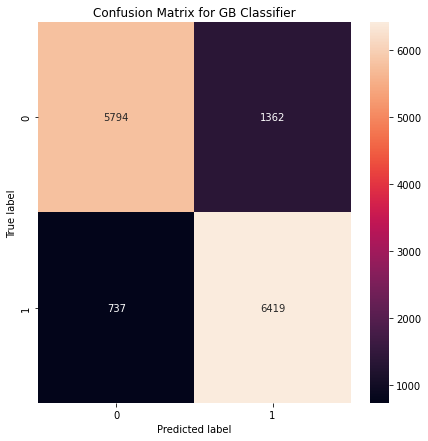

In [194]:
#lets plot confusion matrix for GB

cm= confusion_matrix(y_test, predGB)

x_axis_labels =["0","1"]
y_axis_labels =["0","1"]

f, ax =plt.subplots(figsize=(7,7))

sns.heatmap(cm, annot=True, fmt='.0f', ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.title('Confusion Matrix for GB Classifier')
plt.show()

# Checking the Cross Validation Score


In [195]:
#cv score for DTC

print(cross_val_score(DTC, x,y, cv=5).mean())

0.8303376830517835


In [196]:
#cv score for RFC

print(cross_val_score(RFC, x,y, cv=5).mean())

0.8815887663367077


In [197]:
#cv score for LR

print(cross_val_score(LR, x,y, cv=5).mean())

0.8814839181741011


In [198]:
#cv score for KNN

print(cross_val_score(knn, x,y, cv=5).mean())

0.8471265700560353


In [199]:
#cv score for GB

print(cross_val_score(GB, x,y, cv=5).mean())

0.8466449653429008


from the differance between accuracy_score and CV score we can conclude that Random Forest Classifier is our best fitting model

# Hyper Parameter Tuning

In [90]:
from sklearn.model_selection import GridSearchCV

In [200]:
parameter = {'criterion':['gini','entropy'],
             'max_depth': [10,15],
             'n_estimators':[10,100],
             'max_features': ["auto","sqrt"]}

In [201]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [203]:
GCV.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [10, 100]})

In [204]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'auto',
 'n_estimators': 100}

In [205]:
Final_model=RandomForestClassifier(criterion='gini',
 max_depth= 15,
 max_features='auto',
 n_estimators= 100)
Final_model.fit(x_train, y_train)
pred =Final_model.predict(x_test)
acc=accuracy_score(y_test, pred)
print(acc*100)

86.52179988820569


# ROC AUC Curve:

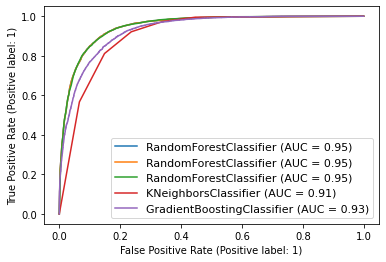

In [206]:
#plotting for all the models used here

from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(RFC, x_test, y_test)
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(LR, x_test, y_test, ax=disp.ax_)
plot_roc_curve(knn, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GB, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

The AUC for best model is 0.95

# Saving the Model

In [209]:
import joblib
joblib.dump(Final_model, "Census_Income_Prediction.pkl")

['Census_Income_Prediction.pkl']

# Predicting the Saved model

In [210]:
model=joblib.load("Census_Income_Prediction.pkl")

prediction=model.predict(x_test)
prediction

array([0, 0, 1, ..., 1, 1, 1])

In [211]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"]).T

,Predicted,Original
0,0,0
1,0,0
2,1,1
3,0,0
4,1,0
...,...,...
14307,1,1
14308,0,0
14309,1,1
14310,1,1


The predicted and actual values are almost the same

